In [1]:
import numpy as np 
#产生正态分布的数据100组，中心点（0，0），其标准差σ为1
p=np.random.randn(100,2)
#将中心点移动到（5,0），作为第0类
for i in range(100):
    p[i][0]+=5
    p[i][1]+=0

#产生正态分布的数据100组，中心点（0，0），其标准差σ为1，作为第1类
f=np.random.randn(100,2)
#产生正态分布的数据100组，中心点（0，0），其标准差σ为1
t=np.random.randn(100,2)
#将中心点移动到（3.5,3.5），作为第2类
for i in range(100):
    t[i][0]+=3.5
    t[i][1]+=3.5

In [2]:
import pandas as pd 

#将np数组转换成dataframe
df_p=pd.DataFrame(p,columns=['x','y'])
#加上标签z,1类标签1
df_p['z']=0

#将np数组转换成dataframe
df_f=pd.DataFrame(f,columns=['x','y'])
#加上标签z,0类标签0
df_f['z']=1


#将np数组转换成dataframe
df_t=pd.DataFrame(t,columns=['x','y'])
#加上标签z,2类标签2
df_t['z']=2

#将正负类合并成一个dataframe
res = pd.concat([df_p, df_f,df_t], axis=0)
res

,x,y,z
0,6.078669,-0.517253,0
1,5.302986,1.129988,0
2,5.009613,1.225857,0
3,3.758161,-0.315786,0
4,5.360210,-0.375185,0
5,5.710155,-0.496786,0
6,4.579099,-0.531689,0
7,2.649697,1.835499,0
8,5.276772,-1.717779,0
9,4.168785,-0.901316,0


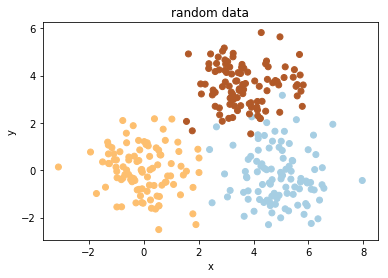

In [15]:
import matplotlib.pyplot as plt
#绘制出数据集的散点图
plt.scatter(res['x'], res['y'], c=res['z'],cmap=plt.cm.Paired)

plt.xlabel('x')
plt.ylabel('y')
plt.title('random data')
plt.show()

In [4]:
#重置数据集索引，应为合并后数据索引重复
res.reset_index(inplace=True, drop=True)
#取索引是4的整数倍的的数据做为测试集
test=res[(res.index%4==0)]
#取索引不是4的整数倍的的数据做为训练集
train=res[(res.index%4!=0)]

In [5]:
from sklearn import svm
#新建SVC分类器,核函数是线性核，C将决定间隔的大小C越大间隔越小

#训练数据
X=train[['x','y']]
#选择训练集的标签
y = train['z']
#svm分类器，线性核
clf = svm.SVC(kernel='linear', C=1)
#训练
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

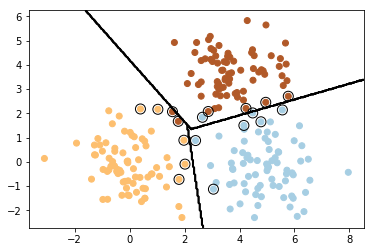

In [11]:
plt.scatter(X['x'], X['y'], c=y,cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
#获得坐标系边界
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# 0-1生成300个点
xx = np.linspace(xlim[0], xlim[1], 300)
yy = np.linspace(ylim[0], ylim[1], 300)
#生成网格坐标
YY, XX = np.meshgrid(yy, xx)
#将网格坐标组成样本
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#求xy到分界线的函数距离
Z = clf.predict(xy).reshape(XX.shape)
# 绘制等高线线
ax.contour(XX, YY, Z, colors='k')
# 绘制出支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [14]:
#预测点
clf.predict([[2,0],[2.5,0],[3,0]])

array([1, 0, 0], dtype=int64)

In [12]:
#训练集得分
clf.score(X,y)

0.9866666666666667

In [13]:
#测试集
clf.score(test[['x','y']],test[['z']])

0.96